In [6]:
import sys
import os

# Get the parent directory
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))

# Add it to sys.path
sys.path.append(parent_dir)
print(parent_dir)

/Users/serfe26/Documents/tesis/Quadcopter-Deep-RL


In [7]:
from matplotlib import pyplot as  plt
from env.equations import inv_transform_x
from simulation import plot_rollouts, n_rollouts
from env import QuadcopterEnv, QuadcopterWrapper
from models import ActorCriticDDPG
from spinup.algos.pytorch.ddpg.noise import OUNoise
from env.params import STATE_NAMES, ACTION_NAMES, REWARD_NAMES

/opt/homebrew/Caskroom/miniforge/base/envs/spiningup/lib/python3.9/site-packages/gym/logger.py:30: UserWarning: WARN: Box bound precision lowered by casting to float32
  warnings.warn(colorize('%s: %s'%('WARN', msg % args), 'yellow'))


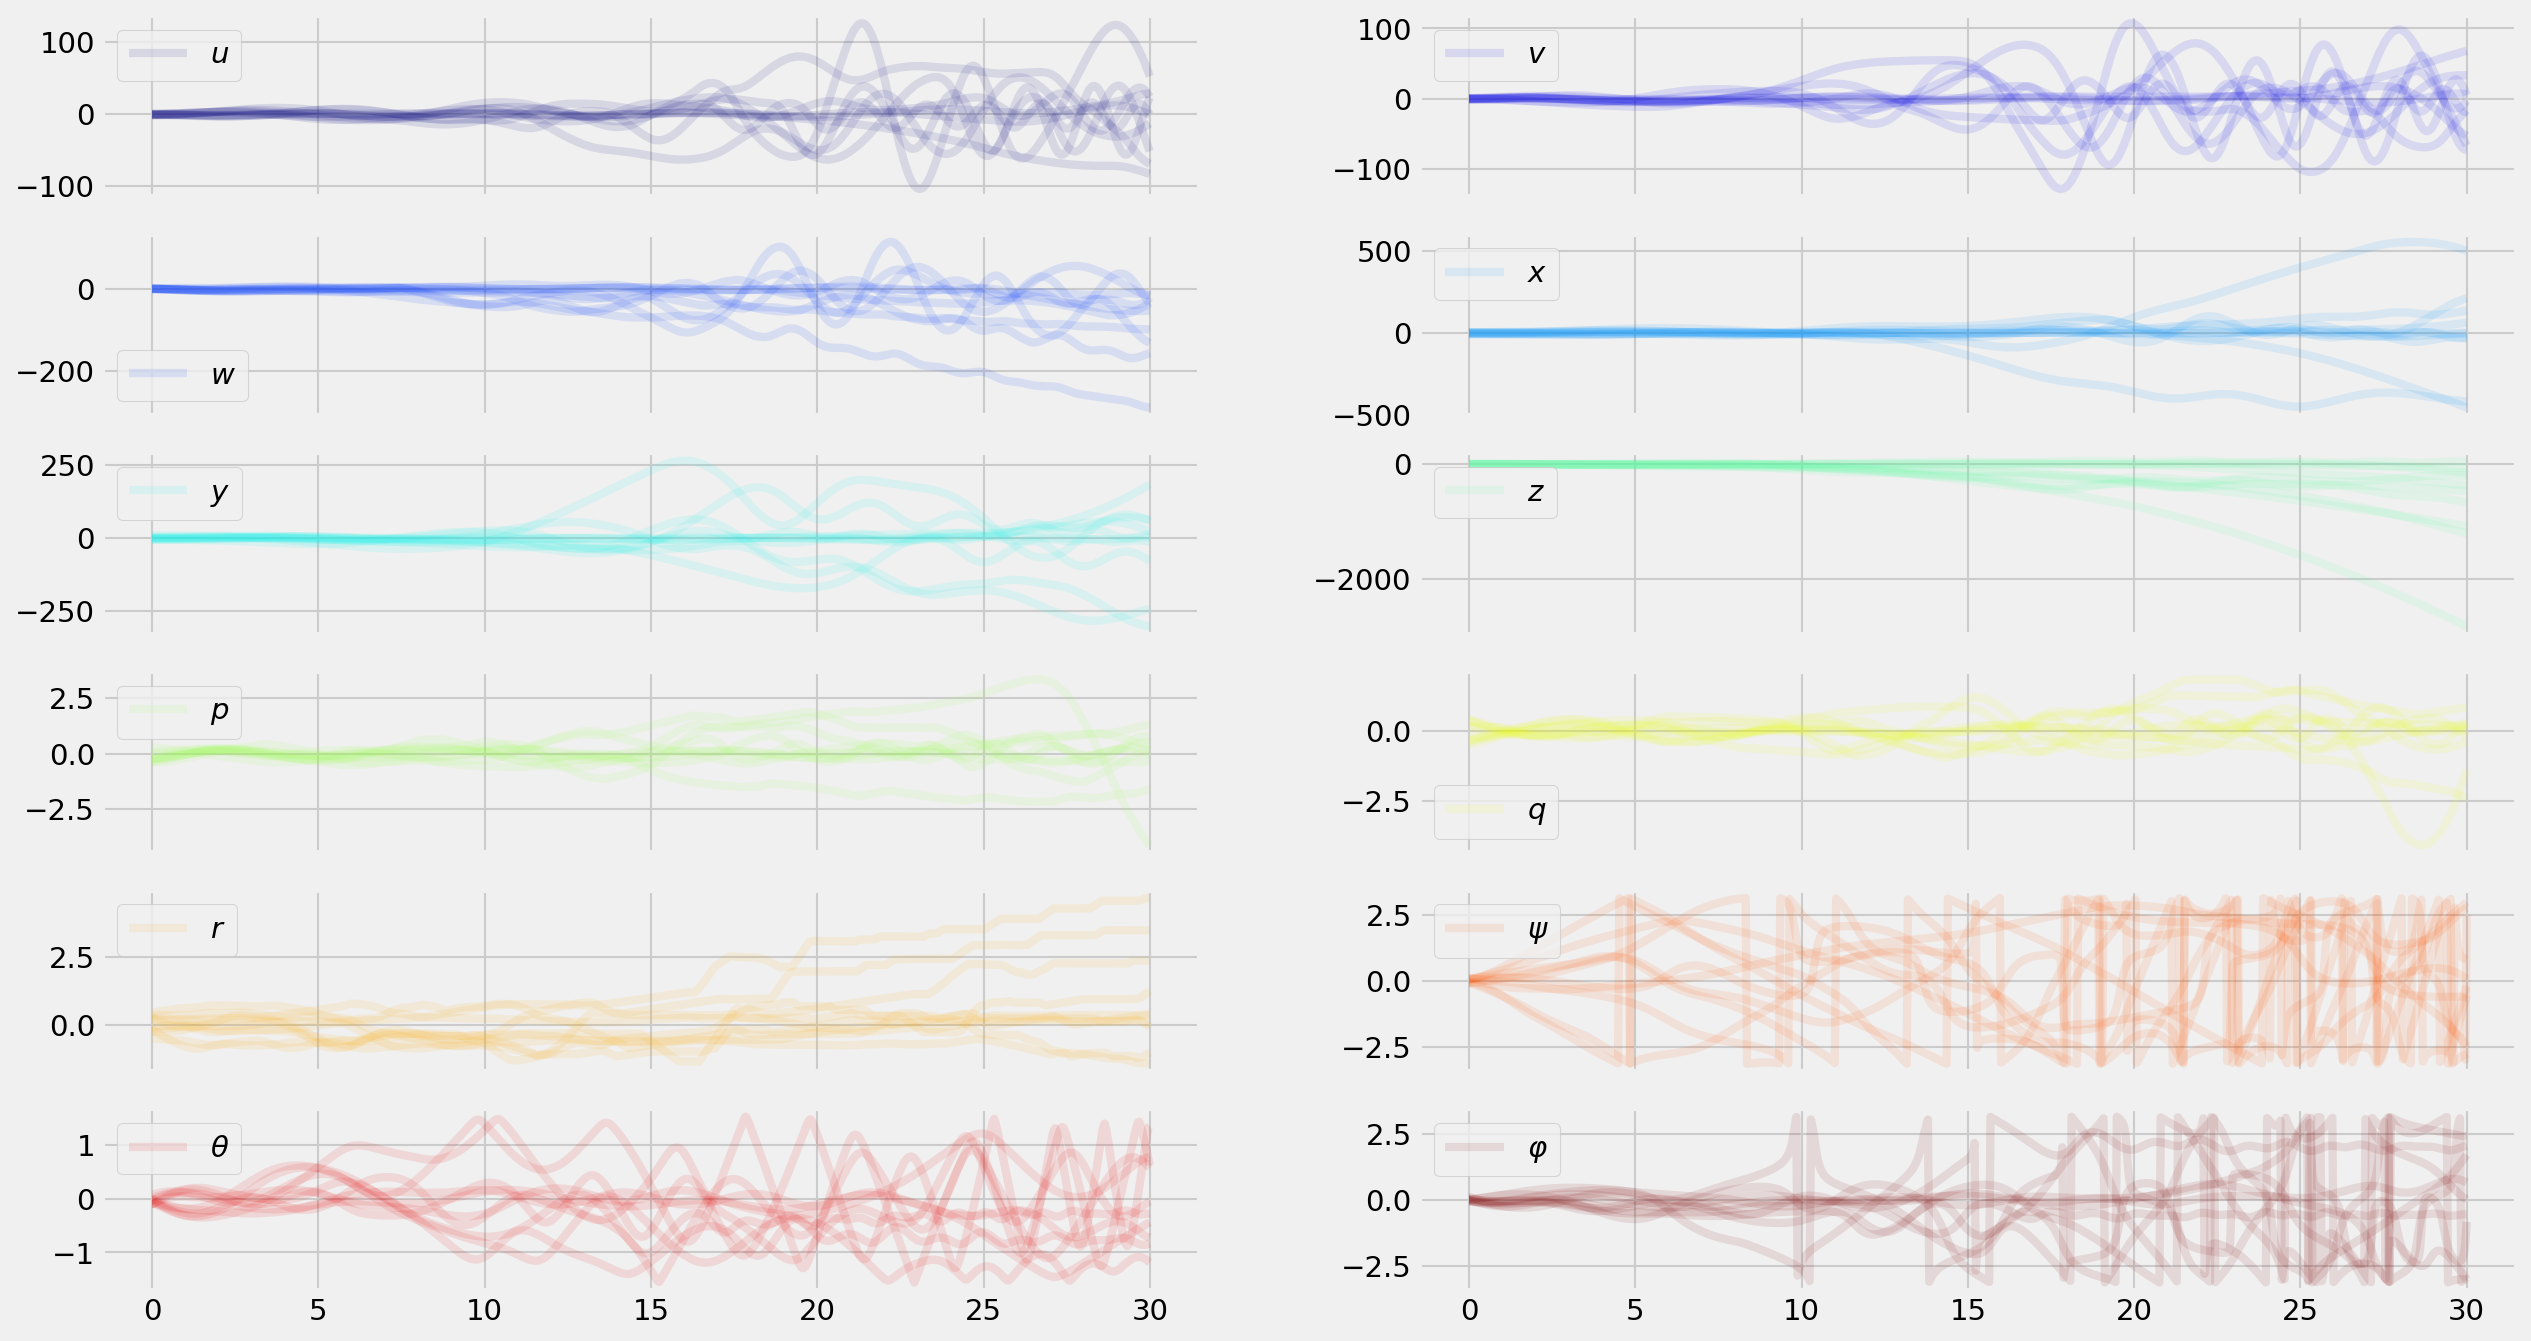

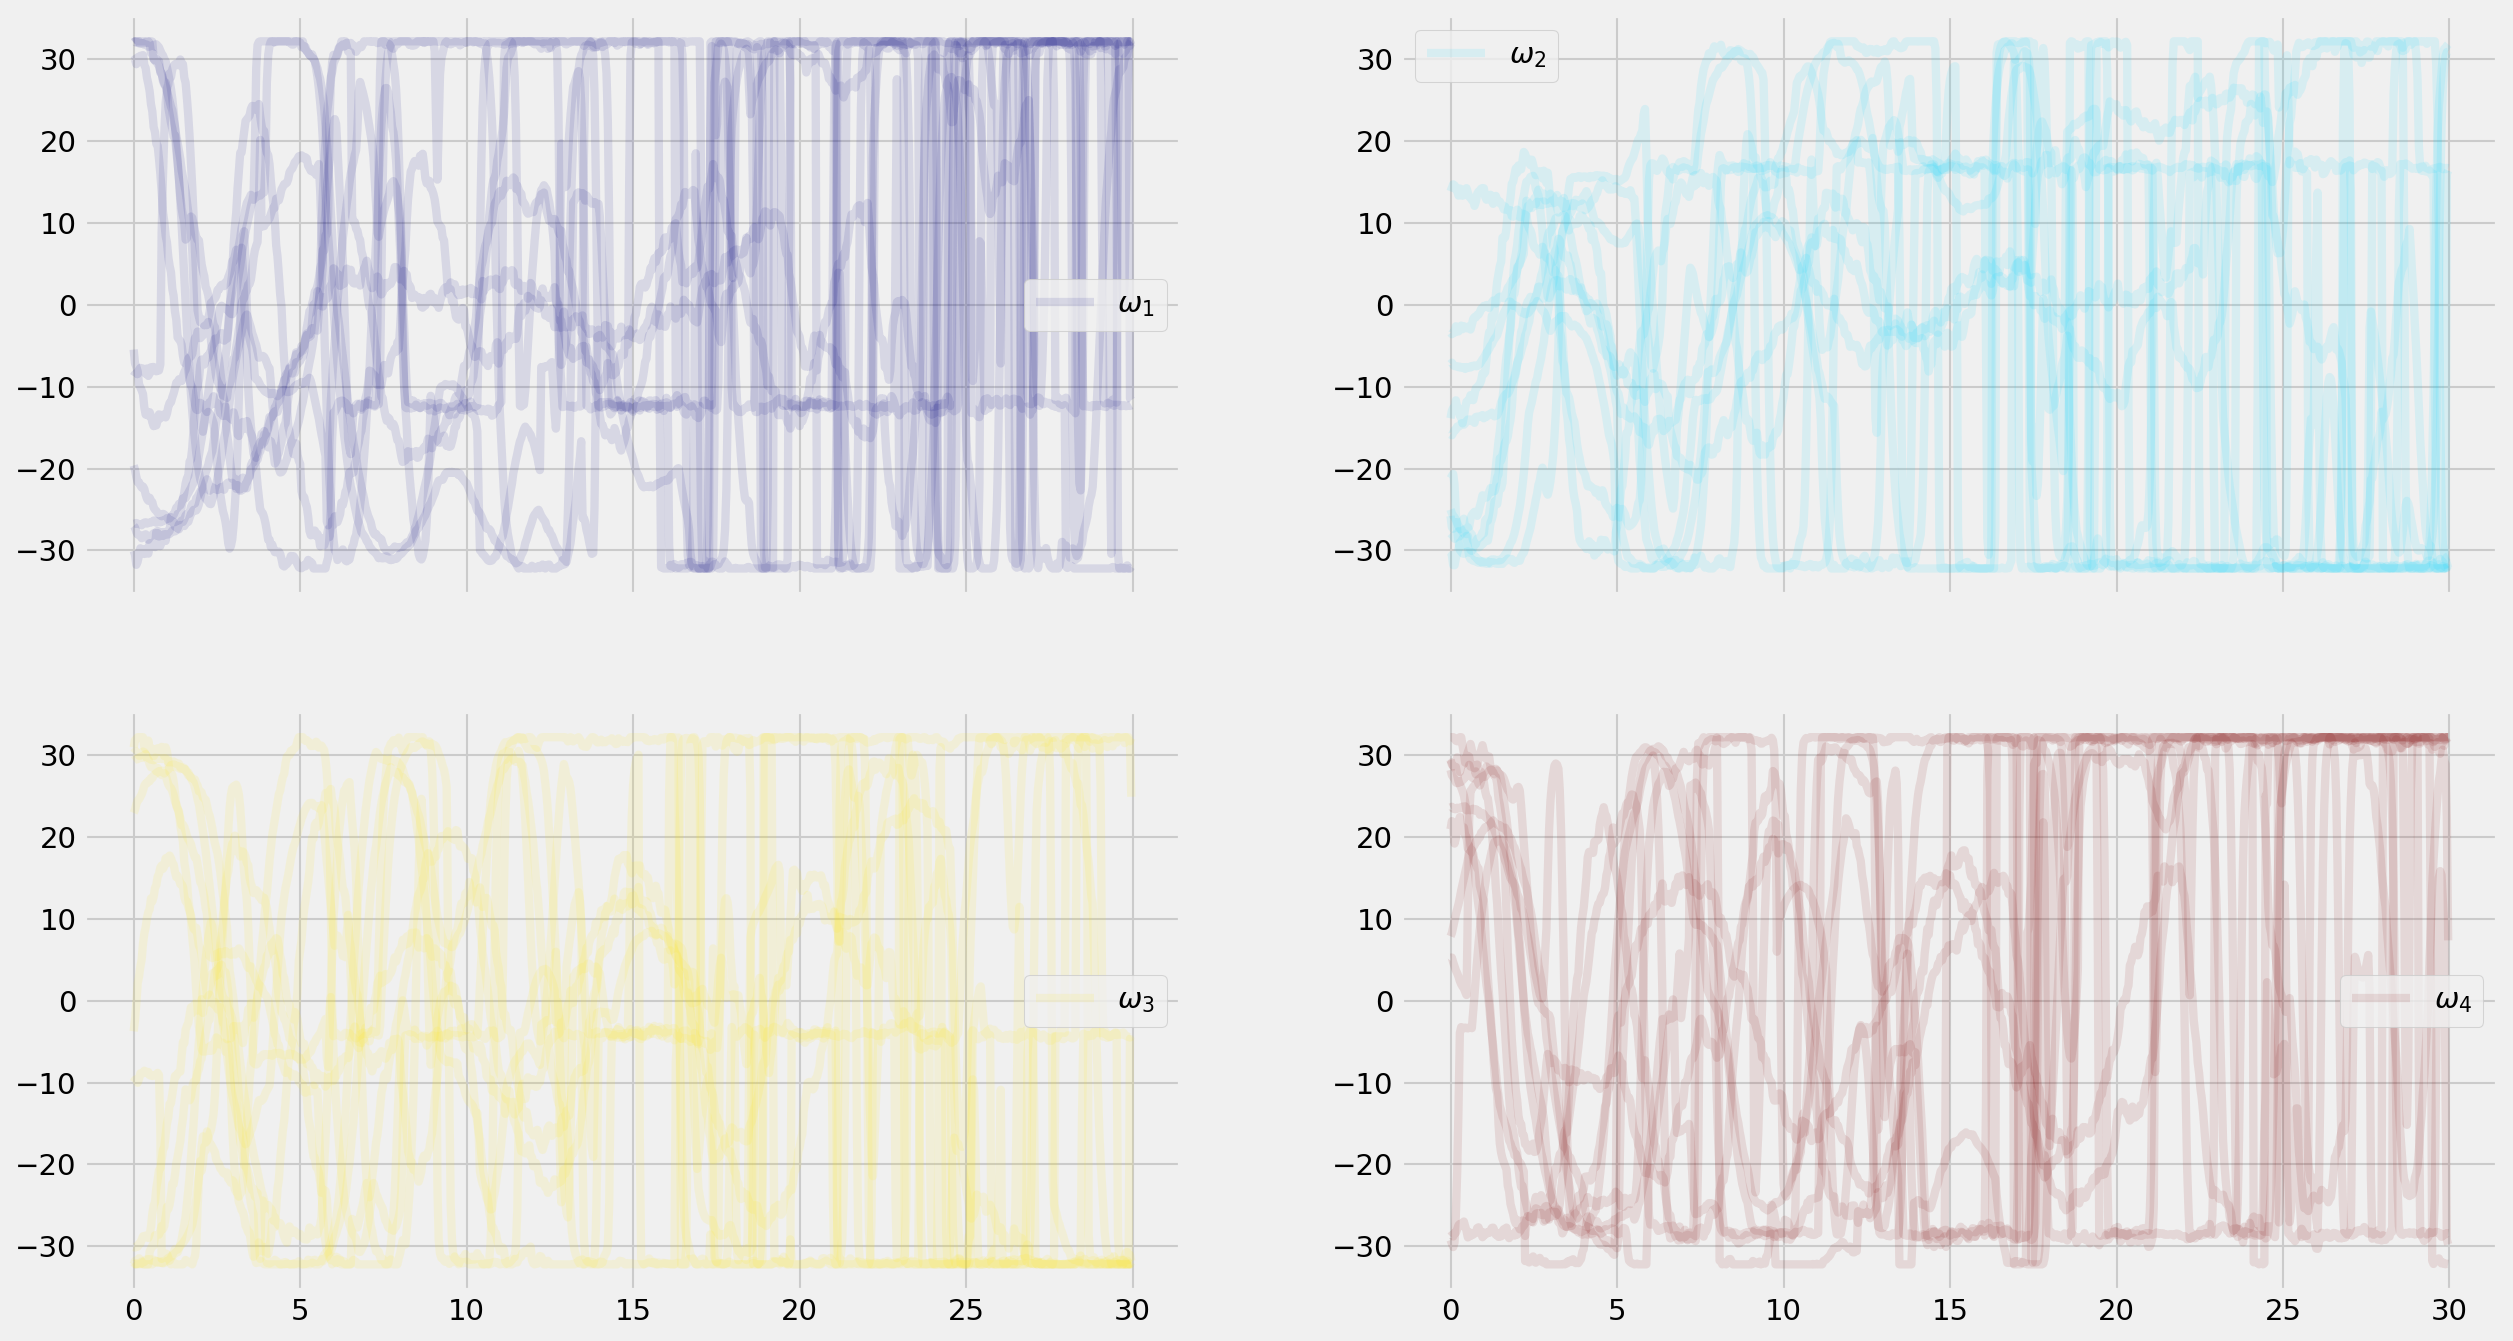

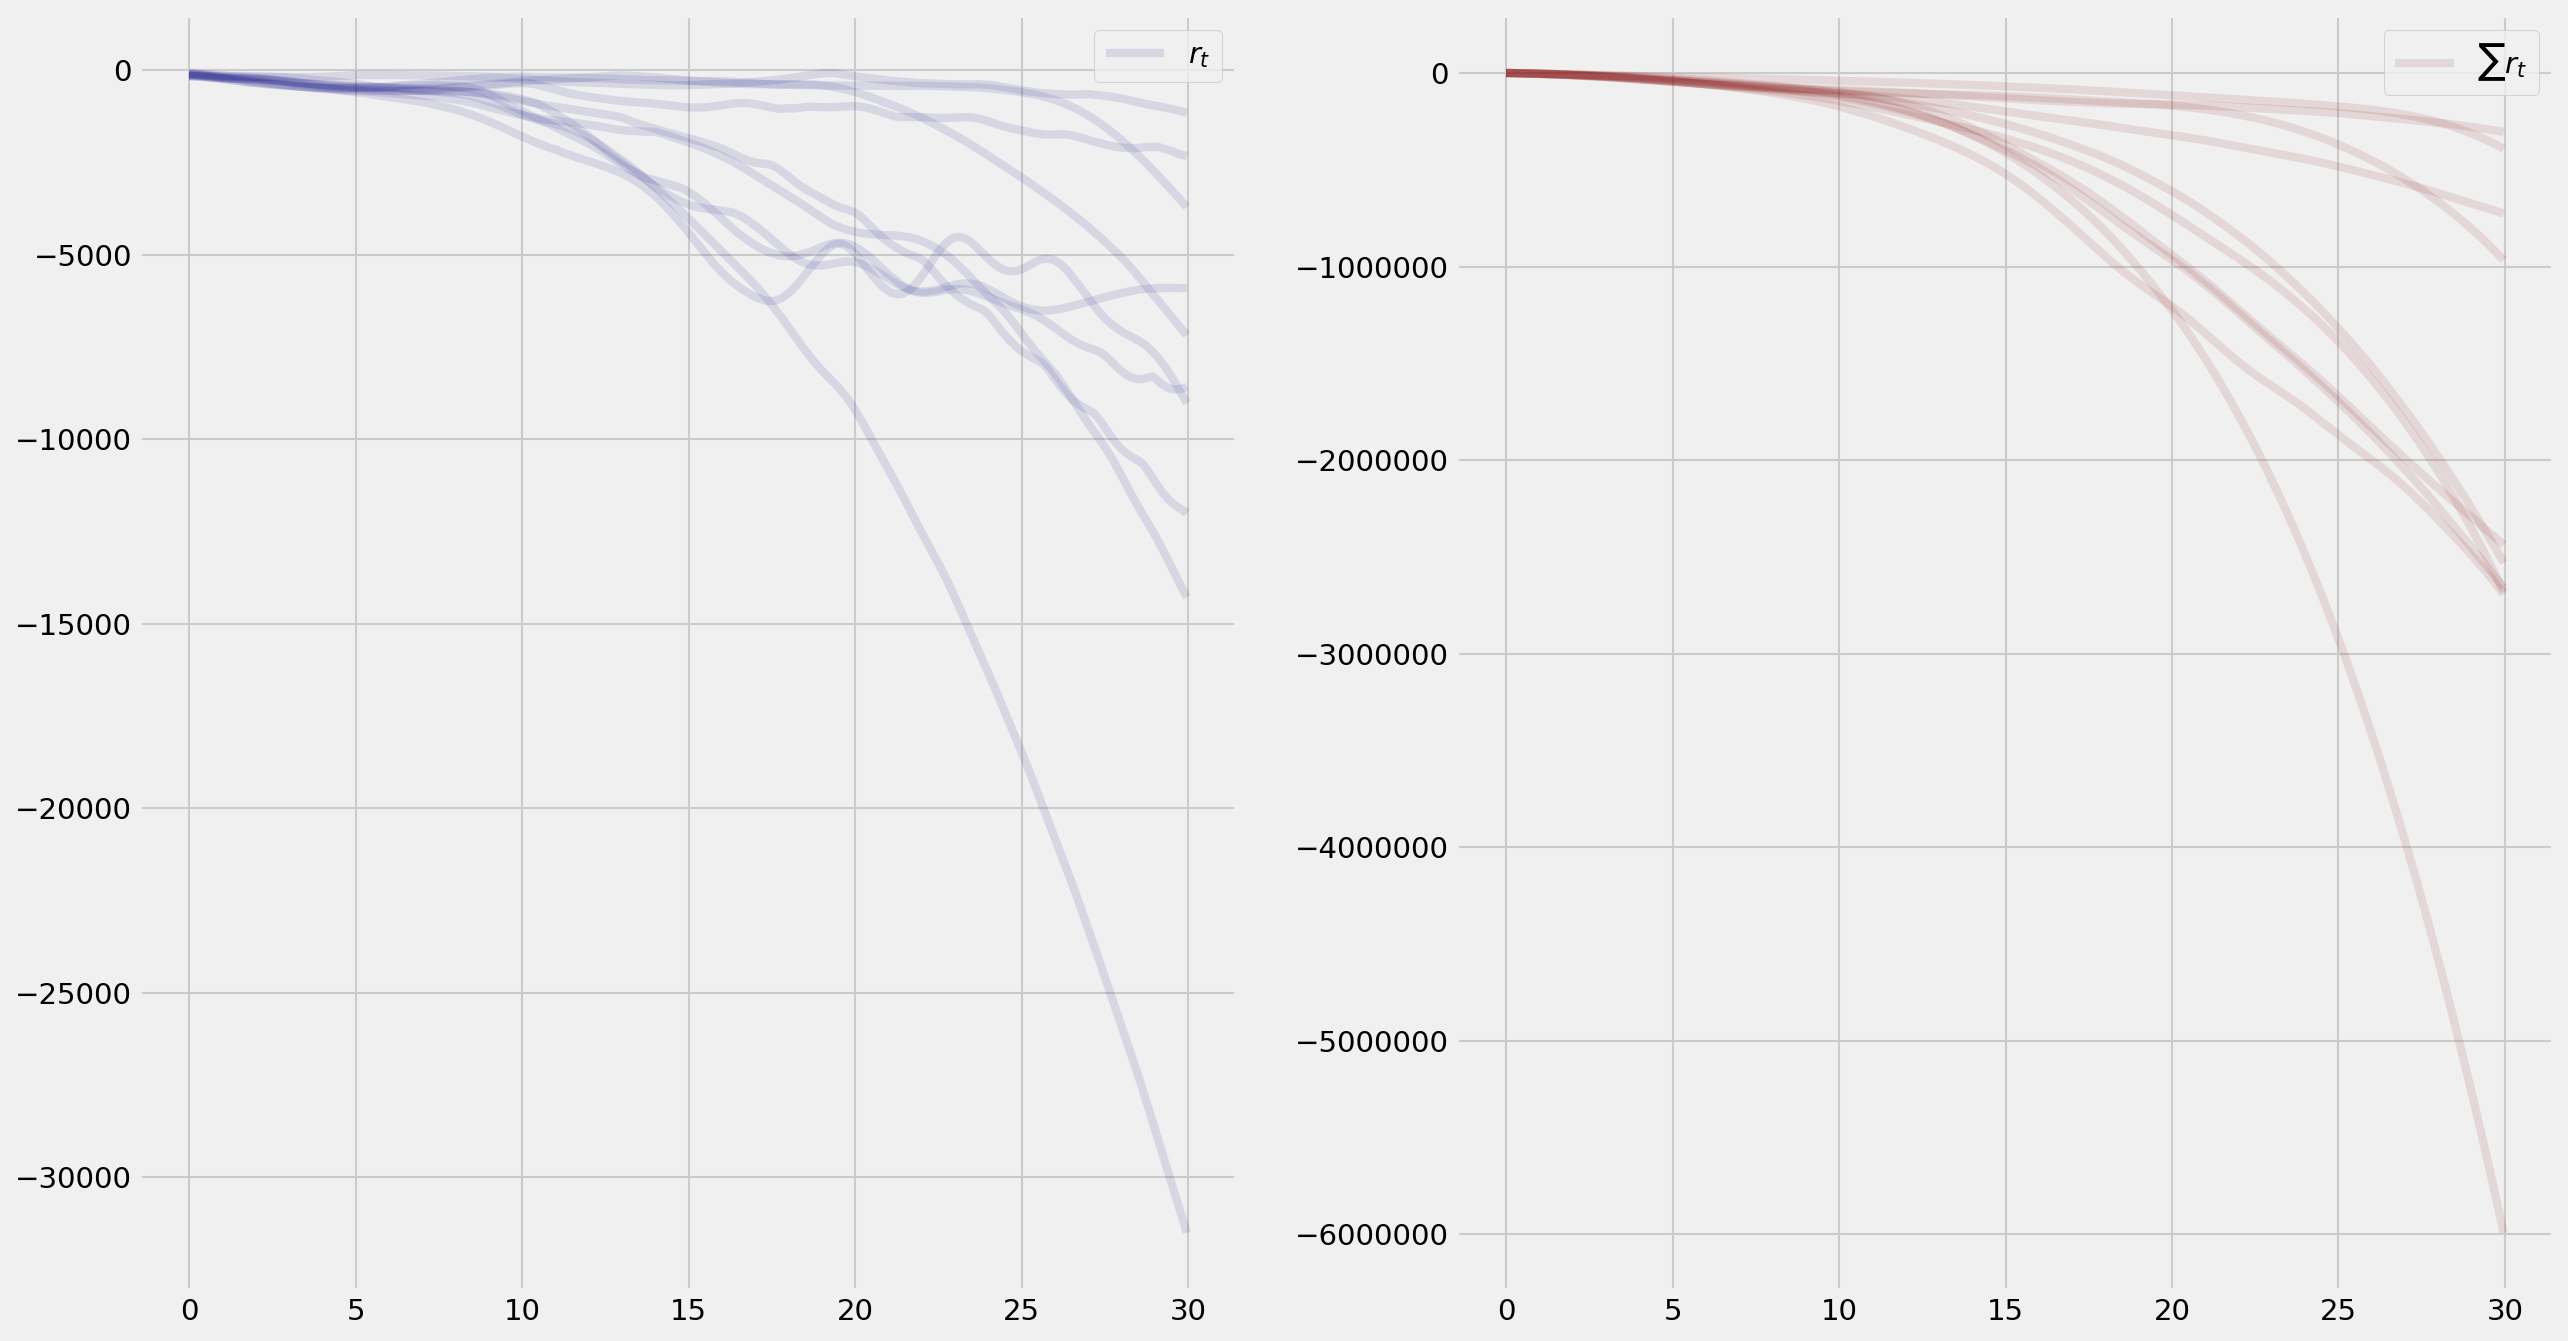

In [8]:
noise_mu=0.0
noise_theta=0.10
noise_max_sigma=0.5
noise_min_sigma=0.1
noise_decay_period=1e4

noise = OUNoise(mu=noise_mu, 
                theta=noise_theta, 
                max_sigma=noise_max_sigma, 
                min_sigma=noise_min_sigma, 
                decay_period=noise_decay_period
                )
path = '/Users/serfe26/Documents/Servicio_Social/Quadcopter-Deep-RL/results_gps/24_10_22_09_57/policy' # 'saved_policies/best_gps/policy'
env = QuadcopterWrapper(QuadcopterEnv(noise=noise))
agent = ActorCriticDDPG(env.observation_space, env.action_space, hidden_sizes=[64, 64], checkpoint=path)
states, actions, scores = n_rollouts(agent, env, n=10, t_x=inv_transform_x, noise=noise)
fig1, _ = plot_rollouts(states, env.time, STATE_NAMES, alpha=0.1)
plt.show()
fig2, _ = plot_rollouts(actions, env.time, ACTION_NAMES, alpha=0.1)
plt.show()
fig3, _ = plot_rollouts(scores, env.time, REWARD_NAMES, alpha=0.1)
plt.show()
